In [30]:
import pandas as pd
from textblob import TextBlob
from googletrans import Translator
from wordcloud import WordCloud
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from string import punctuation 
from nltk.corpus import stopwords

from IPython.display import display, HTML


import matplotlib.pyplot as plt
%matplotlib inline

setQuerySearch("coronavirus covid19")
setSince("2020-03-15")
setNear("Lisbon,Portugal")
setWithin("15mi")
setLang("pt")
setMaxTweets(30)

In [2]:
tweets = pd.read_csv("../tweets.csv")
tweets.head()
pd.set_option('display.max_colwidth', None)

df = tweets[['text']]
df.head()


,text
0,"As minhas #corridas deste fim de semana. . #CoronaVirus #FiqueEmCasa . . . Weekend's #running . #Covid19 #StayAtHome . em Lisboa, Portugal - União Européia https://www.instagram.com/p/B-48rybgCX9/?igshid=17eovdprflw5t"
1,O que andam falando de Portugal por aí... #coronavirus #covid19
2,Boraaaa!! #2020 #covid19 #fiqueemcasa #coronavirus #stopcovid19 #uniao #life #lifestyle #cadadiaimporta em Portugal https://www.instagram.com/p/B-ww1XzBmwA/?igshid=2g75c01a86sw
3,Eis a Quinta-feira Santa 2020! Uma Semana Santa abençoada e com saúde! #semanasanta2020 #obrigada #instagood #holyweek #covid19 #coronavirus ##lifestyle #thanksgod #pic em Portugal https://www.instagram.com/p/B-wfSzrhFggjl6aYcmcqLEIaNUQaoWyNvrd01s0/?igshid=bxkym3lhgtse
4,"A minhas #corrida deste fim de semana. . #CoronaVirus #FiqueEmCasa . . . Weekend's #running . #Covid19 #StayAtHome . em Lisboa, Portugal - União Européia https://www.instagram.com/p/B-ne200glbQ/?igshid=rwo925z0xr31"


In [61]:
#stopwords = set(stopwords.words('portuguese') + list(punctuation))

stopwords = {"coronavirus","covid19", "covid19pt","covid","CoronaVirus","FiqueEmCasa", "fiqueemcasa", "Covid19","StayAtHome",
            "Coronavirus.","COVID2019", "COVID19" "Coronavirus", "STOPCOVID19", "ficaemcasa"}

# Function to clean Portuguese text and tokenize it
def preProcessing(text):
    #text = text.lower() # convert text to lower-case
    text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
    text = re.sub('RT[\s]+', '', text) # Removing RT
    text = re.sub(r'#([^\s]+)', r'\1', text) # remove the # in #hashtag
    text = word_tokenize(text) # remove repeated characters
    word_list = [word for word in text if word not in stopwords]
    text = ' '.join(word_list)
    return text


translator = Translator()

# Function to translate the current text to english
def Translation(text):
    if  translator.detect(text) != 'en':
        traducao = translator.translate(text, dest='en')
        return traducao.text
    else:
        return text
    
    


In [62]:
df['text_clean'] = df['text'].apply(preProcessing)
df['text_en'] = df['text_clean'].apply(Translation)

df

,text,text_clean,text_en,pos,compound,neu,neg,Classification
0,"As minhas #corridas deste fim de semana. . #CoronaVirus #FiqueEmCasa . . . Weekend's #running . #Covid19 #StayAtHome . em Lisboa, Portugal - União Européia https://www.instagram.com/p/B-48rybgCX9/?igshid=17eovdprflw5t","As minhas corridas deste fim de semana . . . . . Weekend 's running . . em Lisboa , Portugal - União Européia","My races this weekend. . . . . Weekend 's running. . in Lisbon, Portugal - European Union",0.000,0.0000,1.000,0.000,Neutral
1,O que andam falando de Portugal por aí... #coronavirus #covid19,O que andam falando de Portugal por aí ...,What are they talking about Portugal out there ...,0.000,0.0000,1.000,0.000,Neutral
2,Boraaaa!! #2020 #covid19 #fiqueemcasa #coronavirus #stopcovid19 #uniao #life #lifestyle #cadadiaimporta em Portugal https://www.instagram.com/p/B-ww1XzBmwA/?igshid=2g75c01a86sw,Boraaaa ! ! 2020 stopcovid19 uniao life lifestyle cadadiaimporta em Portugal,Boraaaa! ! 2020 stopcovid19 uniao life lifestyle cadadiaimporta in Portugal,0.000,0.0000,1.000,0.000,Neutral
3,Eis a Quinta-feira Santa 2020! Uma Semana Santa abençoada e com saúde! #semanasanta2020 #obrigada #instagood #holyweek #covid19 #coronavirus ##lifestyle #thanksgod #pic em Portugal https://www.instagram.com/p/B-wfSzrhFggjl6aYcmcqLEIaNUQaoWyNvrd01s0/?igshid=bxkym3lhgtse,Eis a Quinta-feira Santa 2020 ! Uma Semana Santa abençoada e com saúde ! semanasanta2020 obrigada instagood holyweek # lifestyle thanksgod pic em Portugal,Here is Holy Thursday 2020! A blessed and healthy Holy Week! weeksanta2020 thanks instagood holyweek # lifestyle thanksgod pic in Portugal,0.359,0.8774,0.641,0.000,Positive
4,"A minhas #corrida deste fim de semana. . #CoronaVirus #FiqueEmCasa . . . Weekend's #running . #Covid19 #StayAtHome . em Lisboa, Portugal - União Européia https://www.instagram.com/p/B-ne200glbQ/?igshid=rwo925z0xr31","A minhas corrida deste fim de semana . . . . . Weekend 's running . . em Lisboa , Portugal - União Européia","To my run this weekend. . . . . Weekend 's running. . in Lisbon, Portugal - European Union",0.000,0.0000,1.000,0.000,Neutral
5,o corona vírus reage de modo diferente consoante o hospedeiro e é por esse motivo que a vacina vai/ ou está a demorar #pandemia #covid19 #vacina,o corona vírus reage de modo diferente consoante o hospedeiro e é por esse motivo que a vacina vai/ ou está a demorar pandemia vacina,the corona virus reacts differently depending on the host and that is why the vaccine will / or is taking a pandemic vaccine,0.000,0.0000,1.000,0.000,Neutral
6,#TBT Lisboa - Abril - 2019 ___________________________________________ #lisboa #parede #carcavelos #cascais #estoril #bondinho #trem #abril #primavera #outono #coronavid19 #covi̇d19 #coronavirus… https://www.instagram.com/p/B-e_Qf8HEMo/?igshid=12fek0qlm4n7a,TBT Lisboa - Abril - 2019 ___________________________________________ lisboa parede carcavelos cascais estoril bondinho trem abril primavera outono coronavid19 covi̇d19 coronavirus…,TBT Lisboa - April - 2019 ___________________________________________ lisbon wall carcavelos cascais estoril cable car train april spring autumn coronavid19 covi̇d19 coronavirus…,0.000,0.0000,1.000,0.000,Neutral
7,"E agora um momento de rara beleza aqui na minha página: Lisboa, 1 de Abril, Quarta, 8h25m, vamos todos ficar bem! (Sem qualquer filtro) #covid #covid19pt #covid19 #coronavirus #vamostodosficarbem… https://www.instagram.com/p/B-bgovfH0dA/?igshid=142gp6ajxhsci","E agora um momento de rara beleza aqui na minha página : Lisboa , 1 de Abril , Quarta , 8h25m , vamos todos ficar bem ! ( Sem qualquer filtro ) vamostodosficarbem…","And now a moment of rare beauty here on my page: Lisbon, April 1st, Wednesday, 8h25m, let's all be well! (Without any filter)",0.228,0.7345,0.772,0.000,Positive
8,"Interessante, especialmente o método 1 e, neste, o uso de água morna e vinagre. Os outros métodos já me parecem desactualizados para os tempos actuais (teriam sido úteis em janeiro

In [56]:
analyzer = SentimentIntensityAnalyzer()

def vaderSentimentPos(sentence):
    vs = analyzer.polarity_scores(sentence)
    return vs['pos']

def vaderSentimentCompound(sentence):
    vs = analyzer.polarity_scores(sentence)
    return vs['compound']

def vaderSentimentNeu(sentence):
    vs = analyzer.polarity_scores(sentence)
    return vs['neu']

def vaderSentimentNeg(sentence):
    vs = analyzer.polarity_scores(sentence)
    return vs['neg']

# Function to get classification
def getClassification(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound > -0.05 and compound < 0.05:
        return 'Neutral'
    elif compound <= -0.05:
        return 'Negative'
    
def pretty_print(df):
    return display(HTML( df.to_html().replace("\\n","<br>")))



df['pos'] = df['text_en'].apply(vaderSentimentPos)
df['neu'] = df['text_en'].apply(vaderSentimentNeu)
df['neg'] = df['text_en'].apply(vaderSentimentNeg)
df['compound'] = df['text_en'].apply(vaderSentimentCompound)

df['Classification'] = df['compound'].apply(getClassification)

df


,text,text_clean,text_en,pos,compound,neu,neg,Classification
0,"As minhas #corridas deste fim de semana. . #CoronaVirus #FiqueEmCasa . . . Weekend's #running . #Covid19 #StayAtHome . em Lisboa, Portugal - União Européia https://www.instagram.com/p/B-48rybgCX9/?igshid=17eovdprflw5t","As minhas corridas deste fim de semana . . . . . Weekend 's running . . em Lisboa , Portugal - União Européia","My races this weekend. . . . . Weekend 's running. . in Lisbon, Portugal - European Union",0.000,0.0000,1.000,0.000,Neutral
1,O que andam falando de Portugal por aí... #coronavirus #covid19,O que andam falando de Portugal por aí ...,What are they talking about Portugal out there ...,0.000,0.0000,1.000,0.000,Neutral
2,Boraaaa!! #2020 #covid19 #fiqueemcasa #coronavirus #stopcovid19 #uniao #life #lifestyle #cadadiaimporta em Portugal https://www.instagram.com/p/B-ww1XzBmwA/?igshid=2g75c01a86sw,Boraaaa ! ! 2020 stopcovid19 uniao life lifestyle cadadiaimporta em Portugal,Boraaaa! ! 2020 stopcovid19 uniao life lifestyle cadadiaimporta in Portugal,0.000,0.0000,1.000,0.000,Neutral
3,Eis a Quinta-feira Santa 2020! Uma Semana Santa abençoada e com saúde! #semanasanta2020 #obrigada #instagood #holyweek #covid19 #coronavirus ##lifestyle #thanksgod #pic em Portugal https://www.instagram.com/p/B-wfSzrhFggjl6aYcmcqLEIaNUQaoWyNvrd01s0/?igshid=bxkym3lhgtse,Eis a Quinta-feira Santa 2020 ! Uma Semana Santa abençoada e com saúde ! semanasanta2020 obrigada instagood holyweek # lifestyle thanksgod pic em Portugal,Here is Holy Thursday 2020! A blessed and healthy Holy Week! weeksanta2020 thanks instagood holyweek # lifestyle thanksgod pic in Portugal,0.359,0.8774,0.641,0.000,Positive
4,"A minhas #corrida deste fim de semana. . #CoronaVirus #FiqueEmCasa . . . Weekend's #running . #Covid19 #StayAtHome . em Lisboa, Portugal - União Européia https://www.instagram.com/p/B-ne200glbQ/?igshid=rwo925z0xr31","A minhas corrida deste fim de semana . . . . . Weekend 's running . . em Lisboa , Portugal - União Européia","To my run this weekend. . . . . Weekend 's running. . in Lisbon, Portugal - European Union",0.000,0.0000,1.000,0.000,Neutral
5,o corona vírus reage de modo diferente consoante o hospedeiro e é por esse motivo que a vacina vai/ ou está a demorar #pandemia #covid19 #vacina,o corona vírus reage de modo diferente consoante o hospedeiro e é por esse motivo que a vacina vai/ ou está a demorar pandemia vacina,the corona virus reacts differently depending on the host and that is why the vaccine will / or is taking a pandemic vaccine,0.000,0.0000,1.000,0.000,Neutral
6,#TBT Lisboa - Abril - 2019 ___________________________________________ #lisboa #parede #carcavelos #cascais #estoril #bondinho #trem #abril #primavera #outono #coronavid19 #covi̇d19 #coronavirus… https://www.instagram.com/p/B-e_Qf8HEMo/?igshid=12fek0qlm4n7a,TBT Lisboa - Abril - 2019 ___________________________________________ lisboa parede carcavelos cascais estoril bondinho trem abril primavera outono coronavid19 covi̇d19 coronavirus…,TBT Lisboa - April - 2019 ___________________________________________ lisbon wall carcavelos cascais estoril cable car train april spring autumn coronavid19 covi̇d19 coronavirus…,0.000,0.0000,1.000,0.000,Neutral
7,"E agora um momento de rara beleza aqui na minha página: Lisboa, 1 de Abril, Quarta, 8h25m, vamos todos ficar bem! (Sem qualquer filtro) #covid #covid19pt #covid19 #coronavirus #vamostodosficarbem… https://www.instagram.com/p/B-bgovfH0dA/?igshid=142gp6ajxhsci","E agora um momento de rara beleza aqui na minha página : Lisboa , 1 de Abril , Quarta , 8h25m , vamos todos ficar bem ! ( Sem qualquer filtro ) vamostodosficarbem…","And now a moment of rare beauty here on my page: Lisbon, April 1st, Wednesday, 8h25m, let's all be well! (Without any filter)",0.228,0.7345,0.772,0.000,Positive
8,"Interessante, especialmente o método 1 e, neste, o uso de água morna e vinagre. Os outros métodos já me parecem desactualizados para os tempos actuais (teriam sido úteis em janeiro

## Top-10 negative tweets

In [57]:
pretty_print(df.sort_values('neg',ascending = False).head(10))


,text,text_clean,text_en,pos,compound,neu,neg,Classification
39,"PORTUGAL ENTRA EM ESTADO DE EMERGÊNCIA AMANHÃ, DIA 19/03. VEJA VÍDEO NO CANAL VAMU VER! NO YOUTUBE @Vamu_Ver #vamuver #estadodeemergencia #portugal #moraremportugal #covid_19 #covid19 #coronavirus #CORONAVIRUS… https://www.instagram.com/p/B94idJ9JWhx/?igshid=fynw4dsoz0uq","PORTUGAL ENTRA EM ESTADO DE EMERGÊNCIA AMANHÃ , DIA 19/03 . VEJA VÍDEO NO CANAL VAMU VER ! NO YOUTUBE _Ver vamuver estadodeemergencia portugal moraremportugal covid_19 CORONAVIRUS…","PORTUGAL ENTERS A STATE OF EMERGENCY TOMORROW, DAY 19/03. SEE VIDEO ON THE CHANNEL VAMU SEE! NO YOUTUBE _See vamuver estadoodeemergencia portugal moraremportugal covid_19 CORONAVIRUS…",0.000,-0.7620,0.778,0.222,Negative
22,O Europeu 2020 foi adiado por COVID-19. A Eurovisão 2020 foi adiada por Coronavirus. A Copa América também foi adiada por Coronavirus. Agora só falta o adiamento dos Jogos Olímpicos de Tóquio por Coronavirus. #COVID2019 #COVID19 #Coronavirus #Tokyo2020 #Olympics #STOPCOVID19,O Europeu 2020 foi adiado por COVID-19 . A Eurovisão 2020 foi adiada por Coronavirus . A Copa América também foi adiada por Coronavirus . Agora só falta o adiamento dos Jogos Olímpicos de Tóquio por Coronavirus . COVID19 Coronavirus Tokyo2020 Olympics,The European 2020 was postponed by COVID-19. Eurovision 2020 has been delayed by Coronavirus. The Copa America was also postponed by Coronavirus. Now we just need to postpone the Tokyo Olympics for Coronavirus. COVID19 Coronavirus Tokyo2020 Olympics,0.000,-0.6597,0.817,0.183,Negative
21,"Enquanto isso, após duas semanas em isolamento... #vamuver #isolamentosocial #covid19portugal #covid19 #coronavirus #CORONAVIRUS #quarentena #brasileirospelomundo #brasileirosemportugal em Portugal https://www.instagram.com/p/B-FFDM-pZWQ/?igshid=14fzog5qjj4l5","Enquanto isso , após duas semanas em isolamento ... vamuver isolamentosocial covid19portugal CORONAVIRUS quarentena brasileirospelomundo brasileirosemportugal em Portugal","Meanwhile, after two weeks in isolation ... vamuver isolamentosocial covid19portugal CORONAVIRUS quarantine brasileirospelomundo brasilemportugal em Portugal",0.000,-0.4019,0.847,0.153,Negative
31,"Não só o cancelamento do Grande Prémio do Mónaco, mas também há 2 Grandes Prémios em Fórmula 1 que foram adiados por Coronavirus, neste caso o GP da Holanda e o GP de Espanha. Mais um ataque de COVID-19. #F1 #F170 #COVID19 #StopCOVID19 #Coronavirus","Não só o cancelamento do Grande Prémio do Mónaco , mas também há 2 Grandes Prémios em Fórmula 1 que foram adiados por Coronavirus , neste caso o GP da Holanda e o GP de Espanha . Mais um ataque de COVID-19 . F1 F170 COVID19 StopCOVID19 Coronavirus","Not only the cancellation of the Monaco Grand Prix, but there are also 2 Grand Prix in Formula 1 that have been postponed by Coronavirus, in this case the Dutch GP and the Spanish GP. Another COVID-19 attack. F1 F170 COVID19 StopCOVID19 Coronavirus",0.117,-0.0900,0.759,0.124,Negative
41,"Trump: “I don’t take responsibility at all."" A execrável arrogância de um facínora sentado em cima de poder bombas e muito dinheiro. #coronavirus #COVID19 #CoronavirusPandemic https://twitter.com/DrDenaGrayson/status/1239971077364695045",Trump : “ I don ’ t take responsibility at all . '' A execrável arrogância de um facínora sentado em cima de poder bombas e muito dinheiro . COVID19 CoronavirusPandemic,Trump: “I don’t take responsibility at all. '' The execrable arrogance of a thug sitting on top of bombs and lots of money. COVID19 CoronavirusPandemic,0.064,-0.3818,0.816,0.121,Negative
29,"Hoje, o meu obrigado vai para o excelente trabalho que os jornalistas estão a fazer durante este problema da Covid-19. Na televisão, na rádio, nos jornais, no on-line, todos têm contribuído. #FicaEmCasa #Covid19 #coronavirus #obrigado #visuais #upsideup #Portugal","Hoje , o meu obrigado vai para o excelente trabalho que os jornalistas estão a fazer durante este problema da Covid-19 . Na televisão , na rádio , nos

## Top-10 neutral tweets

In [40]:
pretty_print(df.sort_values('neu',ascending = False).head(10))

,text,text_clean,text_en,pos,compound,neu,neg,Classification
0,"As minhas #corridas deste fim de semana. . #CoronaVirus #FiqueEmCasa . . . Weekend's #running . #Covid19 #StayAtHome . em Lisboa, Portugal - União Européia https://www.instagram.com/p/B-48rybgCX9/?igshid=17eovdprflw5t","As minhas corridas deste fim de semana. . CoronaVirus FiqueEmCasa . . . Weekend's running . Covid19 StayAtHome . em Lisboa, Portugal - União Européia","My races this weekend. . CoronaVirus StayAt Home. . . Weekend's running. Covid19 StayAtHome. in Lisbon, Portugal - European Union",0.0,0.0,1.0,0.0,Neutral
14,Digam lá! #covid19 #coronavirus #visuals #upsideup,Digam lá! covid19 coronavirus visuals upsideup,Digam lá! covid19 coronavirus visuals upsideup,0.0,0.0,1.0,0.0,Neutral
45,Medidas extraordinárias de contenção e mitigação do coronavírus. Consulte todas em https://www.portugal.gov.pt/download-ficheiros/ficheiro.aspx?v=10317e83-589c-49b6-91ab-26341e747058 #COVID19 #coronavirus,Medidas extraordinárias de contenção e mitigação do coronavírus. Consulte todas em COVID19 coronavirus,Extraordinary measures to contain and mitigate the coronavirus. See all at COVID19 coronavirus,0.0,0.0,1.0,0.0,Neutral
44,Medidas extraordinárias de contenção e mitigação do coronavírus. Consulte todas em https://www.portugal.gov.pt/download-ficheiros/ficheiro.aspx?v=10317e83-589c-49b6-91ab-26341e747058 #COVID19 #coronavirus,Medidas extraordinárias de contenção e mitigação do coronavírus. Consulte todas em COVID19 coronavirus,Extraordinary measures to contain and mitigate the coronavirus. See all at COVID19 coronavirus,0.0,0.0,1.0,0.0,Neutral
43,ARTIGO DE TEXTO PUBLICADO NO NOSSO SITE http://WWW.VAMUVER.COM @Vamu_Ver #vamuver #naovimpraeuropapramorrer #covid19 #coronavirus #CORONAVIRUS #uniaoeuropeia #europa em Portugal https://www.instagram.com/p/B9zkR-SpCE2/?igshid=phwsck4i6i5r,ARTIGO DE TEXTO PUBLICADO NO NOSSO SITE _Ver vamuver naovimpraeuropapramorrer covid19 coronavirus CORONAVIRUS uniaoeuropeia europa em Portugal,TEXT ARTICLE PUBLISHED ON OUR WEBSITE _See vamuver naovimpraeuropapramorrer covid19 coronavirus CORONAVIRUS uniaoeuropeia europe in Portugal,0.0,0.0,1.0,0.0,Neutral
42,@Vamu_Ver #vaificartudobem #vaicorrertudobem #naovimpraeuropapramorrer #vamuver #covid19 #coronavirus em Portugal https://www.instagram.com/p/B91unPSJKyd/?igshid=8t7gxxwixxjp,_Ver vaificartudobem vaicorrertudobem naovimpraeuropapramorrer vamuver covid19 coronavirus em Portugal,_View vaificartudobem vaicorrertudobem naovimpraeuropapramorrer vamuver covid19 coronavirus in Portugal,0.0,0.0,1.0,0.0,Neutral
38,Governo lança site (https://covid19estamoson.gov.pt/) e app sobre o plano de resposta ao #Covid19 #coronavirus #estamoson,Governo lança site ( e app sobre o plano de resposta ao Covid19 coronavirus estamoson,Government launches website (and app about the response plan to Covid19 coronavirus Somos,0.0,0.0,1.0,0.0,Neutral
33,No ar no canal Vamu Ver! no YouTube @Vamu_Ver #covid19 #coronavirus #estadodeemergencia #portugal #aposentadosemportugal #Portugal em Portugal https://www.instagram.com/p/B96639Lpm92/?igshid=1tl4sn7n4012h,No ar no canal Vamu Ver! no YouTube _Ver covid19 coronavirus estadodeemergencia portugal aposentadosemportugal Portugal em Portugal,On the air at Vamu Ver! on YouTube _View covid19 coronavirus estadoodeemergencia portugal retireesport Portugal Portugal in Portugal,0.0,0.0,1.0,0.0,Neutral
28,". . #staysafe #stayathome #coronavirus #teamwork #worldwide #portugal #yomecorono #we #covid19 en Cascais, Lisboa, Portugal https://www.instagram.com/p/B99JcFVB4Nb/?igshid=14yli2vkv4do7",". . staysafe stayathome coronavirus teamwork worldwide portugal yomecorono we covid19 en Cascais, Lisboa, Portugal",". . staysafe stayathome coronavirus teamwork worldwide portugal yomecorono we covid19 en Cascais, Lisboa, Portugal",0.0,0.0,1.0,0.0,Neutral
26,"A primeira metade da minha #corrida deste fim de semana. . #CoronaVirus #FiqueEmCasa . . . First half of this weekend's #running . #Covid19 #St

## Top-10 positive tweets

In [59]:
pretty_print(df.sort_values('pos',ascending = False).head(10))

,text,text_clean,text_en,pos,compound,neu,neg,Classification
3,Eis a Quinta-feira Santa 2020! Uma Semana Santa abençoada e com saúde! #semanasanta2020 #obrigada #instagood #holyweek #covid19 #coronavirus ##lifestyle #thanksgod #pic em Portugal https://www.instagram.com/p/B-wfSzrhFggjl6aYcmcqLEIaNUQaoWyNvrd01s0/?igshid=bxkym3lhgtse,Eis a Quinta-feira Santa 2020 ! Uma Semana Santa abençoada e com saúde ! semanasanta2020 obrigada instagood holyweek # lifestyle thanksgod pic em Portugal,Here is Holy Thursday 2020! A blessed and healthy Holy Week! weeksanta2020 thanks instagood holyweek # lifestyle thanksgod pic in Portugal,0.359,0.8774,0.641,0.000,Positive
27,Covid-19: regras para uma alimentação segura #estamoson #covid19 #coronavirus,Covid-19 : regras para uma alimentação segura estamoson,Covid-19: rules for safe food we're in,0.326,0.4404,0.674,0.000,Positive
24,"Hoje um OBRIGADO especial para os Farmacêuticos (e todos os que trabalham nas farmácias). Já tinha agradecido aos Profissionais de Saúde, mas quis destacar a classe da Farmácias, como agradeço aos Profissionais de Saúde. #FicaEmCasa #covid19 #coronavirus #visuals #upsideup","Hoje um OBRIGADO especial para os Farmacêuticos ( e todos os que trabalham nas farmácias ) . Já tinha agradecido aos Profissionais de Saúde , mas quis destacar a classe da Farmácias , como agradeço aos Profissionais de Saúde . FicaEmCasa visuals upsideup","Today a special THANK YOU for Pharmacists (and everyone who works in pharmacies). I had already thanked the Health Professionals, but I wanted to highlight the Pharmacy class, as I thank the Health Professionals. FicaEmCasa visuals upsideup",0.277,0.8825,0.723,0.000,Positive
18,Obrigado de novo! #médicos #enfermeiros #auxiliares #maqueiros #analistas #outrosnasaude #covid19 #coronavirus #obrigado #ficaemcasa #visuais #upsideup,Obrigado de novo ! médicos enfermeiros auxiliares maqueiros analistas outrosnasaude obrigado ficaemcasa visuais upsideup,Thank you again ! doctors nurses assistants make-up analysts othersnasaude thank you stay visual home upsideup,0.274,0.6476,0.726,0.000,Positive
16,Coronavírus - Dica importante! #covıd19 #coronavirus em Portugal https://www.instagram.com/p/B-K0E12FGM7psLuM-mY6OE61xIPFjZvsDquOlk0/?igshid=1fay284zumli0,Coronavírus - Dica importante ! covıd19 em Portugal,Coronavirus - Important tip! covıd19 in Portugal,0.259,0.2714,0.741,0.000,Positive
35,"Bom dia meus amigos, o momento é de cooperação, vamos saber identificar os sintomas. Via @tuliogadelha #covid19 #coronavirus em Portugal https://www.instagram.com/p/B959A92lSS0/?igshid=yf42ojoi99i0","Bom dia meus amigos , o momento é de cooperação , vamos saber identificar os sintomas . Via em Portugal","Good morning my friends, the time is for cooperation, we will know how to identify the symptoms. Via in Portugal",0.250,0.7184,0.750,0.000,Positive
29,"Hoje, o meu obrigado vai para o excelente trabalho que os jornalistas estão a fazer durante este problema da Covid-19. Na televisão, na rádio, nos jornais, no on-line, todos têm contribuído. #FicaEmCasa #Covid19 #coronavirus #obrigado #visuais #upsideup #Portugal","Hoje , o meu obrigado vai para o excelente trabalho que os jornalistas estão a fazer durante este problema da Covid-19 . Na televisão , na rádio , nos jornais , no on-line , todos têm contribuído . FicaEmCasa obrigado visuais upsideup Portugal","Today, my thanks go to the excellent work that journalists are doing during this Covid-19 problem. On television, radio, newspapers, online, everyone has contributed. FicaEmCasa thank you visual upsideup Portugal",0.241,0.7506,0.688,0.071,Positive
19,"Como se percebeu nos últimos dias, o trabalho em lares de idosos é delicado e merece muita atenção. Assim, aqui fica o meu obrigado aos cuidadores cuidadosos! #covid19 #coronavirus #obrigado #ficaemcasa #visuais #upsideup","Como se percebeu nos últimos dias , o trabalho em lares de idosos é delicado e merece muita atenção . Assim , aqui fica o meu obrigado aos cuidadores cu

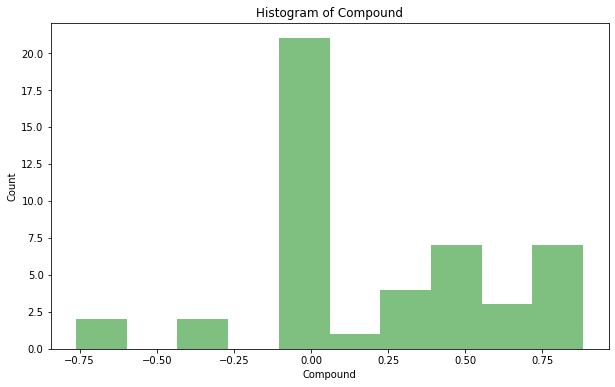

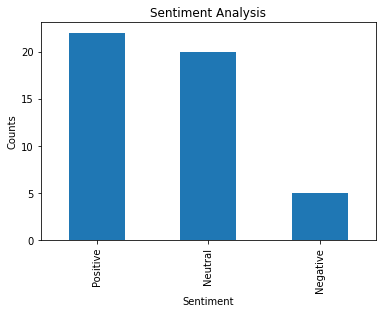

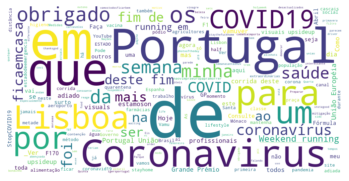

In [60]:
df.describe()

num_bins = 10
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df.compound, num_bins, facecolor='green', alpha=0.5)
plt.xlabel('Compound')
plt.ylabel('Count')
plt.title('Histogram of Compound')
plt.show();


# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Classification'].value_counts().plot(kind = 'bar')
plt.show()

# word cloud visualization
allWords = ' '.join([twts for twts in df['text_clean']])
wordCloud = WordCloud(width=1000, height=500, random_state=21, max_font_size=200,background_color="white").generate(allWords)
plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()